<a href="https://colab.research.google.com/github/yf1209bd/yf1209bd/blob/main/python%E4%BD%9C%E6%A5%AD_%E7%AC%AC%E5%9B%9B%E7%B5%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

參與組員: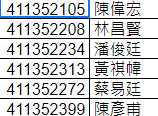

In [ ]:
#1
#請將「imdb_top_1000.xlsx」檔案存到你的Google雲端硬碟中，並分享檔案權限的方式讀取檔案中『Data』工作表中的資料，並命名為imdb1000資料集。(10%)
import pandas as pd
imdb_1000=pd.read_excel("https://drive.google.com/uc?id=1JmQOnDyv57UakbhZb7iVbzlyZNV4OJSa&export=download",header=0,thousands=",")

In [ ]:
#2
#請將imdb1000中欄位名稱為「Series_Title」改成「電影片名」；「Runtime」改為「影片長度」並重新存回imdb1000 (5%)。
imdb_1000=imdb_1000.rename(columns={'Series_Title': '電影片名', 'Runtime': '影片長度'})

In [ ]:
#3
#請用info指令檢視資料集中變數是否符合「imdb_top_1000.xlsx」檔案中『變數定義』所認定之定義；若不是，請將該變數轉型成適當的資料型別(10%)。
imdb_1000.info()

In [ ]:
imdb_1000['Released_Year']=imdb_1000['Released_Year'].to_string()

In [ ]:
imdb_1000.info()

In [ ]:
#4
#請將imdb1000中有遺失值的列刪除，另存成imdb_drop(5%)。
imdb_drop=imdb_1000.dropna()

In [ ]:
#5
#請用「if…elif…elif…else…判斷式」將imdb_drop中「IMDB_Rating」重新定義一個變數為『評等』存回imdb_drop這個資料集內，變數定義如下：(10%)
#A   >= 9.0
#B   < 9.0 and >= 8.5
#C   <8.5 and >= 8.0
#D   <8.0
def rating(score):
  if score >= 9.0:
    return 'A'
  elif score < 9.0 and score >= 8.5:
    return 'B'
  elif score < 8.5 and score >= 8.0:
    return 'C'
  else:
    return 'D'
imdb_drop['評等'] = imdb_drop['IMDB_Rating'].apply(rating)

In [ ]:
#6
#請將imdb_drop中的「電影片名」定義成index並重新存回imdb_drop (5%)。
imdb_drop=imdb_drop.set_index("電影片名")

In [ ]:
#imdb_drop

In [ ]:
#7
#請將imdb_drop中「影片長度」、「IMDB_Rating」、「Meta_score」、「No_of_Votes」、「Gross」5個欄位資料另存為imdb_numeric資料集(5%)。
imdb_numeric=imdb_drop[['影片長度', 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross']]

In [ ]:
#8
#計算imdb_numeric所有欄位的平均數、標準差、最大值、最小值，以及變數間的共變異數及相關係數矩陣(10%)。
imdb_numeric.mean() #平均數

In [ ]:
imdb_numeric.std() #標準差

In [ ]:
imdb_numeric.max() #最大值

In [ ]:
imdb_numeric.min() #最小值

In [ ]:
imdb_numeric.cov() #共變異數

In [ ]:
imdb_numeric.corr() #相關係數矩陣

In [ ]:
#9
#請將imdb_drop中「評等」另存成imdb_rate的資料集(5%)。
imdb_rate=imdb_drop['評等']

In [ ]:
#10
#請將imdb_rate及imdb_numeric兩個資料集進行欄位合併成imdb_merge(5%)。
imdb_merge=pd.concat([imdb_numeric,imdb_rate],axis=1)

In [ ]:
#11
#以imdb_merge中「評等」進行資料分組，分別計算其「影片長度」、「IMDB_Rating」、「Meta_score」、「No_of_Votes」、「Gross」5個變數的平均數、個數(10%)。
grouped=imdb_merge.groupby('評等').agg({
         '影片長度': ['mean', 'count'],
         'IMDB_Rating': ['mean', 'count'],
         'Meta_score': ['mean', 'count'],
         'No_of_Votes': ['mean', 'count'],
         'Gross': ['mean', 'count']})
#grouped

In [ ]:
#12
#請以imdb_drop中「Certificate」項目的次數分配表繪製圓餅圖，並命名該圖表的title為『認證項目圓餅圖』(10%)。
import matplotlib
import matplotlib.pyplot as plt
#下載台北黑體字型
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
# 新增字體
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']
num=imdb_drop['Certificate'].value_counts()
plt.figure
plt.pie(num)
plt.title("認證項目圓餅圖")
plt.show()

In [ ]:
#13
#請篩選imdb_drop中「Certificate」為U的項目，且欄位保留「Certificate」及「Meta_Score」2個變數，另存成imdb_U資料集(5%)。
imdb_U=imdb_drop.loc[imdb_drop['Certificate']=="U",["Certificate","Meta_score"]]

In [ ]:
#14
#請繪製imdb_U中「Meta_Score」變數的莖葉圖(5%)
import sys
!{sys.executable} -m pip install stemgraphic
from stemgraphic import stem_graphic
stem_graphic(imdb_U["Meta_score"])

In [ ]:
#15
#請繪製imdb_drop中「No_of_Votes」的盒鬚圖（以「評等」進行分組）(10%)。
imdb_drop.boxplot(column="No_of_Votes",by="評等")

In [ ]:
#16
#請分別讀入以下兩個檔案，並分別命名為Dat1及Dat2，再將這兩個檔案上下合併(10%)。
#https://mopsfin.twse.com.tw/opendata/t187ap46_O_1.csv
#https://mopsfin.twse.com.tw/opendata/t187ap46_L_1.csv
Dat1 = pd.read_csv("https://mopsfin.twse.com.tw/opendata/t187ap46_O_1.csv")
Dat2 = pd.read_csv("https://mopsfin.twse.com.tw/opendata/t187ap46_L_1.csv")
merged_data = pd.concat([Dat1, Dat2], ignore_index=True)